# Import packages

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define own functions

In [2]:
def centrality_norm_diff(candidate_dict,true_dict):
    
    """Computes the difference of the centrality scores
    given 2 dictionaries"""
    
    score = 0
    for key, val in candidate_dict.items():
        score += np.linalg.norm(val-true_dict[key])
        
        
    return score

# Import data

## Cross-holdings

In [3]:
CH = pd.read_excel('./Data/nasdaq_normalized_cross_holdings.xlsx')
CH = np.array(CH)

In [4]:
CH.shape

(10, 11)

In [5]:
stock_names = CH[:,0]

CH = CH[:,1:]

In [6]:
CH = np.asarray(CH,dtype=np.float64)

In [7]:
CH = np.round(CH,2)

## Neighbourhood-selection

In [8]:
NE_estimated_matrix = np.genfromtxt('./Data/Estimated_networks/NE.csv',
                              delimiter=',')

In [9]:
NE_estimated_matrix.shape

(11, 11)

In [10]:
NE_estimated_matrix = NE_estimated_matrix[1:,1:]

## SPACE

In [12]:
SPACE_estimated_matrix = np.genfromtxt('./Data/Estimated_networks/SPACE.csv',
                              delimiter=',')

print(SPACE_estimated_matrix.shape)

(11, 11)


In [13]:
# Preprocess data
SPACE_estimated_matrix = SPACE_estimated_matrix[1:,1:]
SPACE_estimated_matrix = np.round(SPACE_estimated_matrix,2)

## GLASSO

In [14]:
GLASSO_estimated_matrix = np.genfromtxt('./Data/Estimated_networks/GLASSO.csv',
                              delimiter=',')

print(GLASSO_estimated_matrix.shape)

(11, 11)


In [15]:
# Preprocess data
GLASSO_estimated_matrix = GLASSO_estimated_matrix[1:,1:]
GLASSO_estimated_matrix = np.round(GLASSO_estimated_matrix,2)

# Transform data to networks

In [16]:
CH_G = nx.from_numpy_matrix(CH, create_using=nx.DiGraph)

In [17]:
NE_estimated_G = nx.from_numpy_matrix(NE_estimated_matrix, create_using=nx.DiGraph)
SPACE_estimated_G = nx.from_numpy_matrix(SPACE_estimated_matrix, create_using=nx.DiGraph)
GLASSO_estimated_G = nx.from_numpy_matrix(GLASSO_estimated_matrix, create_using=nx.DiGraph)

# Compute centrality measures

In [18]:
stock_names

array(['jpm', 'ms', 'bac', 'c', 'wfc', 'gs', 'usb', 'tfc', 'bk', 'td'],
      dtype=object)

## Katz-Bonacich centrality

In [19]:
CH_katz_bonacich = nx.katz_centrality(CH_G)

In [21]:
#CH_katz_bonacich

In [22]:
NE_estimated_katz_bonacich = nx.katz_centrality(NE_estimated_G)

#NE_estimated_katz_bonacich

In [23]:
SPACE_estimated_katz_bonacich = nx.katz_centrality(SPACE_estimated_G)

#SPACE_estimated_katz_bonacich

In [24]:
GLASSO_estimated_katz_bonacich = nx.katz_centrality(GLASSO_estimated_G)

#GLASSO_estimated_katz_bonacich

### Comparison

In [25]:
NE_katz_bonacich_score = centrality_norm_diff(candidate_dict=NE_estimated_katz_bonacich,
                                              true_dict=CH_katz_bonacich)

SPACE_katz_bonacich_score = centrality_norm_diff(candidate_dict=SPACE_estimated_katz_bonacich,
                                              true_dict=CH_katz_bonacich)

GLASSO_katz_bonacich_score = centrality_norm_diff(candidate_dict=GLASSO_estimated_katz_bonacich,
                                              true_dict=CH_katz_bonacich)

In [26]:
print(NE_katz_bonacich_score)
print(SPACE_katz_bonacich_score)
print(GLASSO_katz_bonacich_score)


0.5729148853680013
0.7396015609211217
0.6629804452365877


# Visualize networks

In [84]:
# Relabel nodes
mapping = {}
for i in range(0,len(stock_names)):
    
    mapping[i] = stock_names[i]

In [85]:
NE_estimated_G = nx.relabel_nodes(NE_estimated_G, mapping)

In [86]:
degrees = [i[1] for i in list(nx.degree(NE_estimated_G))]

In [90]:
# Use spring_layout to handle positioning of graph
layout = nx.shell_layout(NE_estimated_G)

# Use a list for node_sizes
sizes = degrees*5000

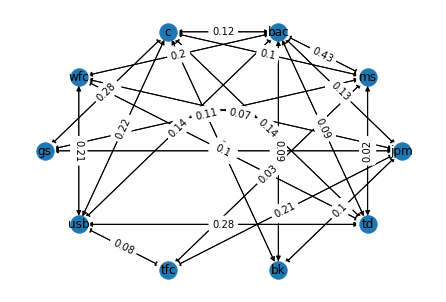

In [92]:
# Draw the graph using the layout - with_labels=True if you want node labels.
nx.draw(NE_estimated_G, layout, with_labels=True)

# Get weights of each edge and assign to labels
labels = nx.get_edge_attributes(NE_estimated_G, "weight")

# Draw edge labels using layout and list of labels
nx.draw_networkx_edge_labels(NE_estimated_G, pos=layout, edge_labels=labels)

plt.savefig("./Figures/NE_method_network_viz.pdf",dpi=120)
# Show plot
plt.show()